<a href="https://colab.research.google.com/github/raul-miranda/DS-201-Project-1/blob/main/D201_Project_2_raul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stroke Predictions**
---
Ana Ortez-Rivera, Olga Tolchinsky, Rongjia Zhang, Raul Miranda

Data Science 201 - Spring 2021
Project 2
April 29, 2021

Source of dataset: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

## **1. Introduction**


Background on medical studies

The features of the data are as follows:

*   id: unique identifier - numerical
*   gender: "Male", "Female" or "Other" - categorical
*   age: age of the patient - numerical
*   hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension - categorical
*   heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease - categorical
*   ever_married: "No" or "Yes" - categorical
*   work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" - categorical
*   Residence_type: "Rural" or "Urban" - categorical
*   avg_glucose_level: average glucose level in blood - continuous
*   bmi: body mass index - continuous
*   smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown" - categorical
*   stroke: 1 if the patient had a stroke or 0 if not - categorical

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient




## **2. Data Wrangling**

### 2a. Loading the Data

In [75]:
# Importing packages
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
# Uploading Json file with token key (USERNAME, KEY)
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [259]:
# Loading csv into dateframe
df_health = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
# Viewing data

df_health[:10]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
# Checking data types of dataframe
print (df_health.shape)
print (df_health.dtypes)

(5110, 12)
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [260]:
# Drop  "id" column; unnecessary for prediction
df_health.drop('id', inplace=True, axis=1)

In [ ]:
# Descriptive statistics of numerical variables
df_health.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [78]:
# Checking the NAs in the dataset
df_health.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [261]:
# Replace NaN with mean value of bmi to avoid changing the column mean - create copy to preserve original df_health dataset
df_health_2 = pd.DataFrame(df_health).copy()
df_health_2['bmi'] = df_health_2['bmi'].fillna(df_health_2['bmi'].mean())
df_health_2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [83]:
# Viewing remaining nulls
df_health_2.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [262]:
# Replace 'Unknown'  'smoking_status' to the most common for the same gender, work_type and residence_type groups
print (df_health_2['smoking_status'].value_counts())  # before changing
df_health_2['smoking_status'] = df_health_2['smoking_status'].replace('Unknown', np.nan)   # replace unknown with NaN
df_health_2['smoking_status'] = df_health_2.groupby(
    ['gender','work_type','Residence_type'], 
    sort=False).smoking_status.apply(lambda x: x.fillna(x.mode().iloc[0]))    # replace  NaN with most common for group 
print (df_health_2['smoking_status'].value_counts())  # after changing
print (df_health_2['smoking_status'].isna().sum())    # check for NaN

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
never smoked       3402
formerly smoked     919
smokes              789
Name: smoking_status, dtype: int64
0


## **3. Exploratory Data Analysis (EDA)**


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

### 3a. Histograms


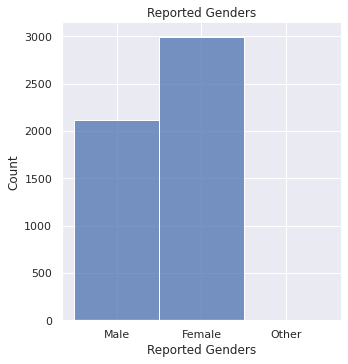

In [84]:
# Graph of genders reported
sns.set_theme(style="darkgrid")
sns.displot(df_health_2['gender'])
plt.xlabel('Reported Genders')
plt.ylabel('Count')
plt.title('Reported Genders')
plt.show()

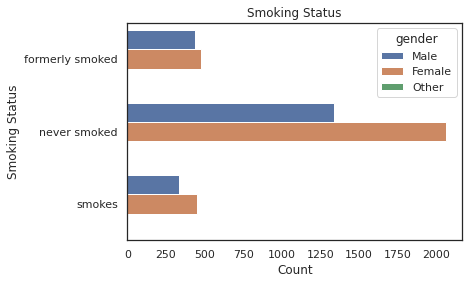

In [85]:
# Graph of smoking status and gender
sns.set_theme(style="white")
sns.countplot(y='smoking_status', hue = 'gender', data=df_health_2)
plt.xlabel('Count')
plt.ylabel('Smoking Status')
plt.title('Smoking Status')
plt.show()

In [ ]:
# Graph of age with stroke

### 3b. Barplot

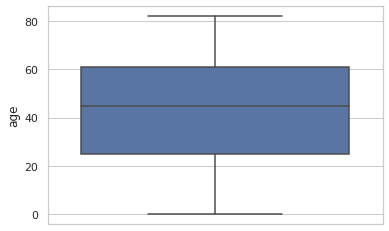

In [87]:
# Graph of ages
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=df_health_2["age"])

### 3c. Scatterplots

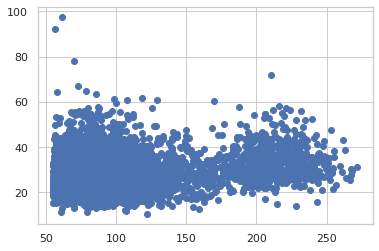

In [89]:
# Viewing average glucose level against bmi
plt.scatter(df_health_2['avg_glucose_level'], df_health_2['bmi'])    

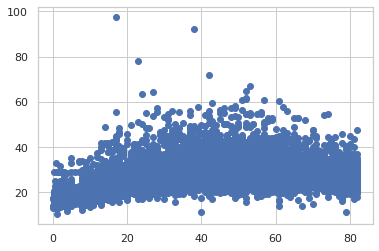

In [93]:
# Viewing bmi against age
plt.scatter(df_health_2['age'], df_health_2['bmi']) 

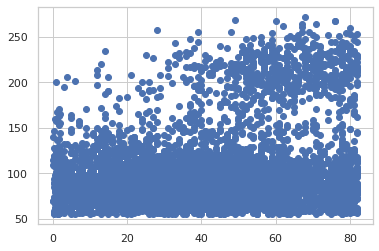

In [94]:
# Viewing Avg Glucose Level against age
plt.scatter(df_health_2['age'], df_health_2['avg_glucose_level'])

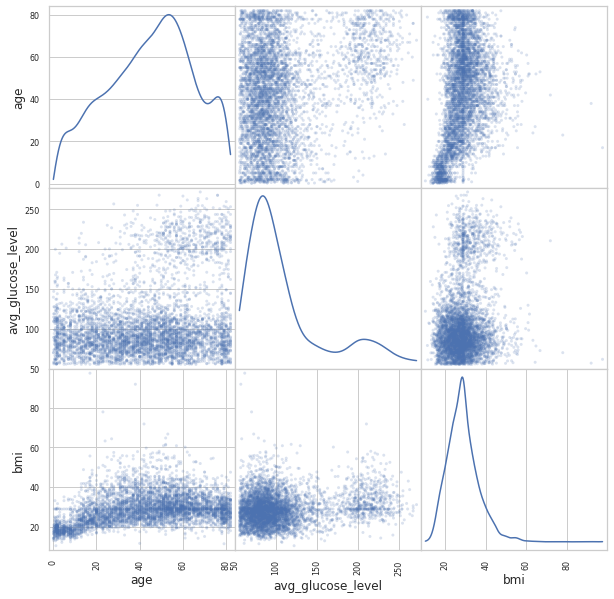

In [91]:
# Correlations between age, glucose level and bmi
scatter_matrix(df_health_2[['age','avg_glucose_level','bmi']], alpha=0.2, figsize=(10,10), diagonal="kde");

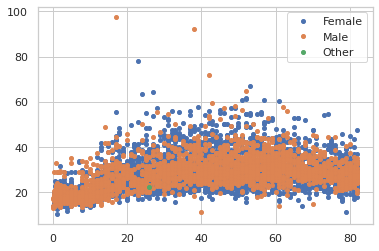

In [95]:
# Viewing the distribution of males and females against age
groups = df_health_2.groupby('gender')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.age, group.bmi, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()

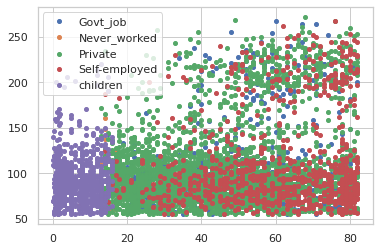

In [97]:

# Viewing distribution of work type (incl children) against age
groups = df_health_2.groupby ('work_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.age, group.avg_glucose_level, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()

### 3d. Density Plot

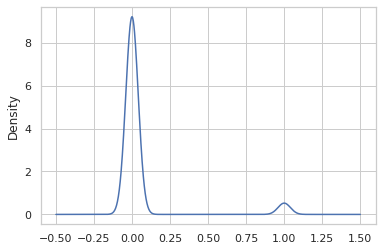

In [98]:
# Graph of hypertension       
df_health_2.heart_disease.plot.kde()

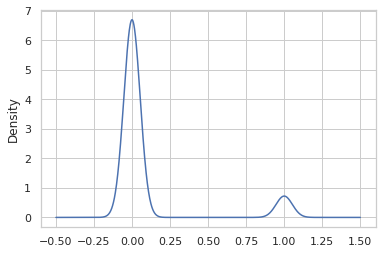

In [99]:
df_health_2.hypertension.plot.kde()

In [ ]:
# Graph of amount of strokes

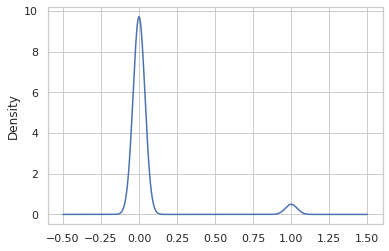

In [100]:
df_health_2.stroke.plot.kde()

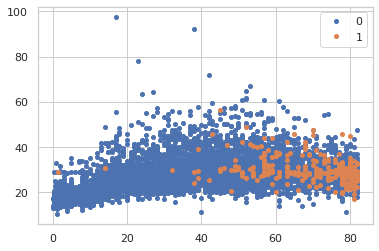

In [101]:
# Graph of strokes with age
groups = df_health_2.groupby('stroke')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.age, group.bmi, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()

In [ ]:
# Graph of strokes with gender

In [ ]:
# Graph of strokes with BMI

In [ ]:
# Graph of stroke with smoking status

In [ ]:
# Graph of stroke with glucose level

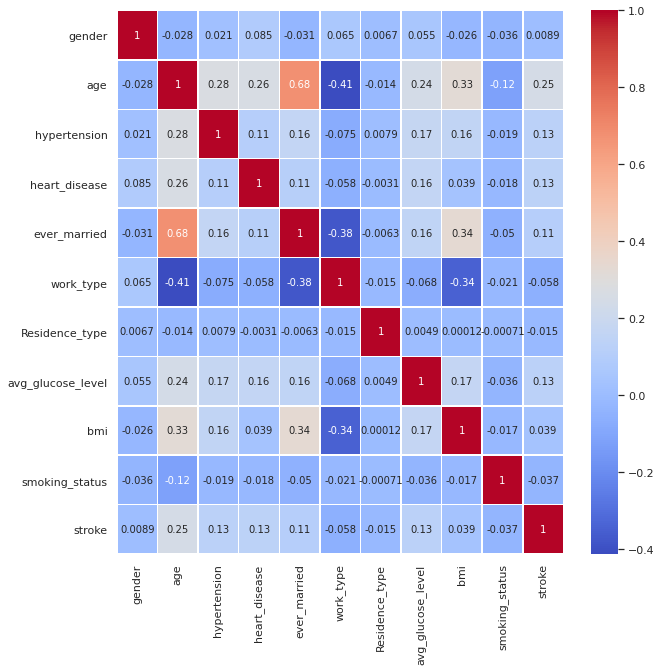

In [291]:
# Correlation Heatmap
import seaborn as sns
Z = df_health_2.copy()
Z['gender'] = Z['gender'].map({'Male':1, 'Female':0, 'Other':2})
Z['ever_married'] = Z['ever_married'].map({'Yes':1, 'No':0})
Z['work_type'] = Z['work_type'].map({'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4})
Z['Residence_type'] = Z['Residence_type'].map({'Urban':0, 'Rural':1})
Z['smoking_status'] = Z['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})

fig, ax = plt.subplots (figsize=(10,10))
sns.heatmap(Z.corr(), cmap='coolwarm', annot=True, linewidths=.5)

## **4. Modeling**

In [102]:
# Import packages

# Mathplotlib
from matplotlib import pyplot as plt
# XGBoost
import xgboost as xgb
from xgboost import plot_importance
# Sklean
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline



###4a. Linear Regression (Olga)

In [264]:
X = df_health_2.drop(['avg_glucose_level', 'stroke'], axis=1)
X.shape

(5110, 9)

In [266]:
y = df_health_2['avg_glucose_level']
y.shape

(5110,)

In [267]:
type(X)

pandas.core.frame.DataFrame

In [268]:
X['gender'] = X['gender'].map({'Male':1, 'Female':0, 'Other':2})
X['ever_married'] = X['ever_married'].map({'Yes':1, 'No':0})
X['work_type'] = X['work_type'].map({'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4})
X['Residence_type'] = X['Residence_type'].map({'Urban':0, 'Rural':1})
X['smoking_status'] = X['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
X.isnull().sum()

gender            0
age               0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
Residence_type    0
bmi               0
smoking_status    0
dtype: int64

In [269]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

In [270]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

In [271]:
X_train.shape, y_train.shape

((3577, 9), (3577,))

In [112]:
X_test.shape, y_test.shape

((1533, 9), (1533,))

In [272]:
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [273]:
y_predicted = LinReg.predict(X_test)

In [274]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

1831.8792484663788


In [275]:
print(mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

1874.6253206149934


In [276]:
LinReg.score(X_test, y_test)

0.09453931074892352

In [277]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

31.959002572832276


(array([  3.,  54., 347., 568., 284.,  93.,  66.,  78.,  36.,   4.]),
 array([-110.36869866,  -82.67218486,  -54.97567105,  -27.27915725,
           0.41735656,   28.11387036,   55.81038416,   83.50689797,
         111.20341177,  138.89992558,  166.59643938]),
 <a list of 10 Patch objects>)

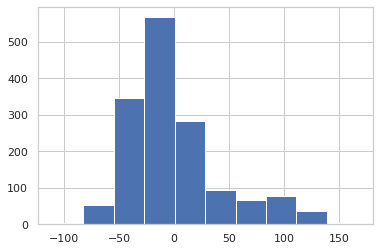

In [278]:
import matplotlib.pyplot as plt
plt.hist(y_test - y_predicted)

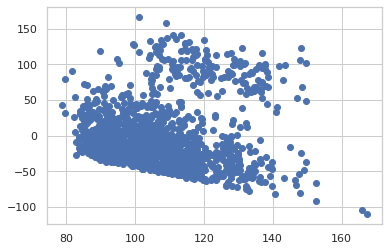

In [279]:
plt.scatter(y_predicted, y_test - y_predicted)

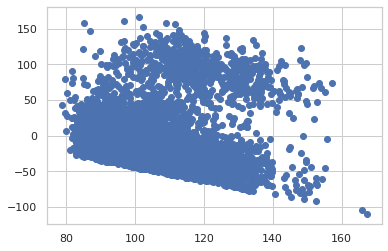

In [280]:
plt.scatter(LinReg.predict(X), y - LinReg.predict(X))

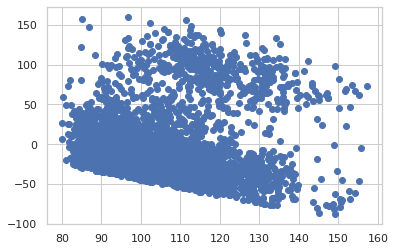

In [281]:
plt.scatter(LinReg.predict(X_train), y_train - LinReg.predict(X_train))

In [284]:
print(X_test.columns)    #   variables
print(LinReg.coef_)      #  regression coefficients for each of the variables

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'bmi', 'smoking_status'],
      dtype='object')
[ 5.49359861  0.3525929  16.22402875 16.50903305 -1.96011194  1.98518154
  0.98839239  0.75499072 -0.06027788]


In [285]:
print(LinReg.intercept_)    #  intercept value of avg_glucose_level

63.7253924350367


###4b. Logistic Regression (Ana)


In [245]:
X = df_health_2.drop('stroke', axis=1)
y = df_health_2['stroke']

X['gender'] = X['gender'].map({'Male':1, 'Female':0, 'Other':2})
X['ever_married'] = X['ever_married'].map({'Yes':1, 'No':0})
X['work_type'] = X['work_type'].map({'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4})
X['Residence_type'] = X['Residence_type'].map({'Urban':0, 'Rural':1})
X['smoking_status'] = X['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})

In [246]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25,random_state=0)
print(X_train.shape , X_test.shape)

(3832, 10) (1278, 10)


In [247]:
from imblearn.over_sampling import SMOTE
smt = SMOTE (random_state=1, ratio='minority')
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)
print ("X_train shape: ", X_train_SMOTE.shape)
print ("y_train shape: ", y_train_SMOTE.shape)
print ("X_test shape: ", X_test.shape)
print ("y_test shape: ", y_test.shape)
type(X_train_SMOTE)

X_train shape:  (7296, 10)
y_train shape:  (7296,)
X_test shape:  (1278, 10)
y_test shape:  (1278,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


numpy.ndarray

In [248]:
LogReg = LogisticRegression()
scaler = preprocessing.StandardScaler()
X_train_SMOTE = scaler.fit_transform(X_train_SMOTE)
X_test = scaler.transform(X_test)
LogReg.fit(X_train_SMOTE,y_train_SMOTE)
y_pred=LogReg.predict(X_test)

In [249]:
print("\n\nAccuracy:",metrics.accuracy_score(y_test, y_pred))     
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))



Accuracy: 0.7621283255086072
Precision: 0.13897280966767372
Recall: 0.7076923076923077


In [250]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [-0.26144774]
Coefficients [[-0.01581793  1.86018831  0.09789174  0.24923466  0.00689107 -0.23920154
  -0.10749419  0.16275624 -0.07230919 -0.04098054]]


In [251]:
print(classification_report(y_test, LogReg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1213
           1       0.14      0.71      0.23        65

    accuracy                           0.76      1278
   macro avg       0.56      0.74      0.55      1278
weighted avg       0.94      0.76      0.83      1278



In [252]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[928, 285],
       [ 19,  46]])

Text(0.5, 257.44, 'Predicted label')

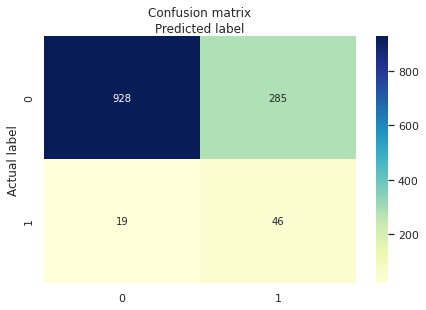

In [253]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

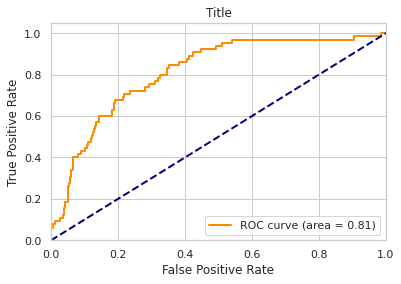

In [254]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Title')
plt.legend(loc="lower right")
plt.show()

### 4c. Decision Tree (Raul)

In [256]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth=8, random_state=1)
dt.fit(X_train_SMOTE,y_train_SMOTE)
y_pred = dt.predict(X_test)

print ("Accuracy: %.4f" % (accuracy_score(y_test, y_pred)))

Accuracy: 0.9085


In [257]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(n_estimators=100,
                            random_state=11)
rf_cl.fit(X_train_SMOTE, y_train_SMOTE)
rf_pred= rf_cl.predict(X_test)
accuracy = float(np.sum(rf_pred==y_test))/y_test.shape[0]
print("Accuracy: %.4f" % (accuracy))

Accuracy: 0.9429


### 4d. XG Boost (Renee)

In [237]:
X_train_SMOTE = pd.DataFrame(X_train_SMOTE)      # XG Boost requires dataframes for X_test, X_train 
type(X_train_SMOTE)

pandas.core.frame.DataFrame

Accuracy: 0.9491


<function matplotlib.pyplot.show>

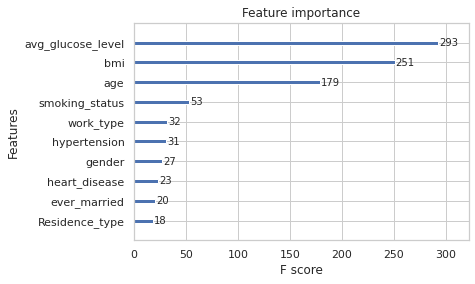

In [234]:
params={'learning_rate':0.4,
        'max_depth':7,
        'num_boost_round':2000,
        'objective': 'multi:softprob',
        'random_state': 7,
        'silent':0,
        'num_class':4,
        'eta':0.8
        }

model= xgb.train(params, xgb.DMatrix(X_train, y_train))
y_pred= model.predict(xgb.DMatrix(X_test))

model.save_model('testXGboostClass.model')

# return the index of the biggest pro
yprob= np.argmax(y_pred, axis=1)

predictions= [round(value) for value in yprob]

#evaluate predictions
accuracy= accuracy_score(y_test, predictions)
print("Accuracy: %.4f"% (accuracy))

plot_importance(model)
plt.show

## **5. Conclusion**
